# Porftolio Optimiser

## Description
This program attempts to optimise a users portfolio using the Efficient Frontier. 

## Goal
Create portfolio of assets for which investment has maximum return for given risk level (ideally minimum) OR create portfolio that offers lowest risk for given expected return.

## Theory
Modern portfolio theory (MPT) is a model to creating a portfolio that aims to maximise the return for a given amount of risk. 

MPT encourages diversification of assets. Consider a portfolio of assets, {A, B, C} where the three assets are 'diverse'. If the three assets have little to zero correlation then we can have a portfolio with low variance on returns. 

Efficient Frontier is a graph of 'Expected returns' versues 'Volatility'. Points inside graph show set of optimal portfolios of expected returns for given risk (measured as volatility) or risk given expected returns. Points outside line are sub-optimal. 

### Assumptions
1. Asset Returns are (Jointly) Normally Distributed Random Variables
2. Correlations between Assets are Fixed and Constant Forever
3. All Investors Aim to Maximize Economic Utility
4. All Investors are Rational and Risk Averse
5. All Investors have Access to the Same Information at the Same Time
6. All Investors have Access to the Same Information at the Same Time
7. There are no Taxes or Transaction Costs
8. Investors are Price Takers
9. Every Investor has a Credit Limit
10. All Securities can be Divided into Parcels of Any Size

### Basics of the model



### 1. Portfolio Expected Return

Each asset in portfolio is weighted i.e. the proportion the asset makes up the portfolio. To calculate expected return of the porfolio we multiply weights of each asset by the expected returns of each asset, and sum.


### 2. Portfolio Standard deviation (volatility)

Calculate the annual covariance matrix and take the inner product with the weights. 

### 3. Sharpe Ratio

Sharpe ratio measures the return of an investment in relation to the risk-free rate and its risk profile.

In general, higher value of Sharpe ratio the better and lucractive the investement. 

### 4. Efficient Frontier

Plot of 'Expected return' vs 'Volatility'




# Import Packages

In [1]:
from assets_class import Asset
from portfolio_class import Portfolio
from datetime import datetime
import numpy as np
import pandas as pd
import yfinance as yf

%load_ext autoreload
%autoreload 2

# Download data

In [2]:
def yf_retrieve_data(ticker_list,date_range):
    data_frames = []
    for ticker in ticker_list:
        data = yf.download(ticker, start=date_range[0], end=date_range[1])
        data_frames.append(data)
    return data_frames

In [3]:
ticker_list = ["AAPL", "FB", "AMZN", "NFLX", "GOOG"]
date_range = ("2010-12-01", "2022-01-01")
data = yf_retrieve_data(ticker_list, date_range)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Create portfolio

In [4]:
portfolio = Portfolio([Asset({"name": ticker, "data": data[i] }) for i,ticker in enumerate(ticker_list) ])


# Optimise Portfolio

In [5]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
returns, stds, weights = portfolio.monte_carlo()

In [10]:
# Drawing the efficient frontier
X = []
y = []
for rt in np.linspace(-300, 200, 1000):
    weights = portfolio.optimise_with_risk_tolerance(rt)
    X.append(portfolio.portfolio_std)
    y.append(portfolio.portfolio_expected_return)

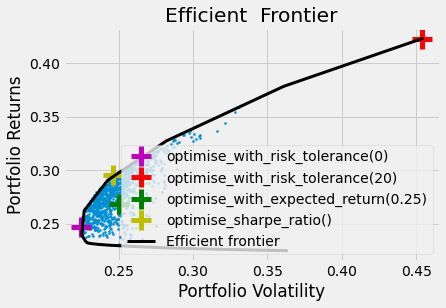

In [30]:
portfolio.optimise_with_risk_tolerance(0)
plt.plot(portfolio.portfolio_std, portfolio.portfolio_expected_return, 'm+', markeredgewidth=5, markersize=20, label='optimise_with_risk_tolerance(0)')

portfolio.optimise_with_risk_tolerance(20)
plt.plot(portfolio.portfolio_std, portfolio.portfolio_expected_return, 'r+', markeredgewidth=5, markersize=20, label='optimise_with_risk_tolerance(20)')

portfolio.optimise_with_expected_return(0.25)
plt.plot(portfolio.portfolio_std, portfolio.portfolio_expected_return, 'g+', markeredgewidth=5, markersize=20, label='optimise_with_expected_return(0.25)')

portfolio.optimise_sharpe_ratio()
plt.plot(portfolio.portfolio_std, portfolio.portfolio_expected_return, 'y+', markeredgewidth=5, markersize=20, label='optimise_sharpe_ratio()')


plt.scatter(stds, returns, s=4)
plt.plot(X, y, color='k', linewidth=3, label='Efficient frontier')
plt.title("Efficient  Frontier")
plt.xlabel("Portfolio Volatility")
plt.ylabel("Portfolio Returns")
plt.legend(loc="lower right")
plt.show()

In [22]:
portfolio.optimise_with_risk_tolerance(0)
riskless_weights = portfolio.weights

In [23]:
portfolio.optimise_with_risk_tolerance(20)
risk_tol_weights = portfolio.weights

In [24]:
portfolio.optimise_sharpe_ratio()
sharpe_ratio_weights = portfolio.weights


In [31]:
portfolio.optimise_with_expected_return(0.25)
exp_return_weights = portfolio.weights



In [25]:
optimal_weights = pd.DataFrame()


In [39]:
optimal_weights = pd.concat([pd.Series(riskless_weights), pd.Series(risk_tol_weights), pd.Series(sharpe_ratio_weights), pd.Series(exp_return_weights)], axis=1)
optimal_weights.index = [asset.name for asset in portfolio.assets]
optimal_weights.columns = ['Riskless', 'Risk_tolerance_20', 'sharpe', 'expected_return']

In [40]:
optimal_weights

,Riskless,Risk_tolerance_20,sharpe,expected_return
AAPL,0.303304,0.000000e+00,0.229892,0.240342
FB,0.058526,0.000000e+00,0.000000,0.382875
AMZN,0.161592,4.163336e-16,0.261654,0.184125
NFLX,0.032171,1.000000e+00,0.257021,0.098051
GOOG,0.444406,0.000000e+00,0.251433,0.094607
